In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [25]:
df1 = pd.read_csv("delivery_time.csv")
df1.info()

# Checking for null vaalues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [26]:
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

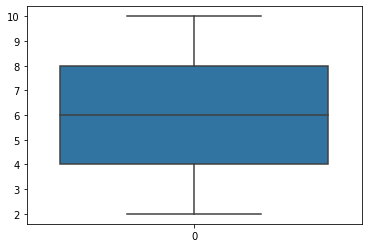

In [28]:
sns.boxplot(data=df1["Sorting Time"])

### Checking for co-relation. 

<AxesSubplot:>

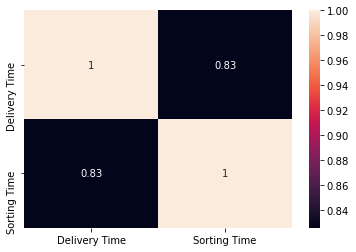

In [4]:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

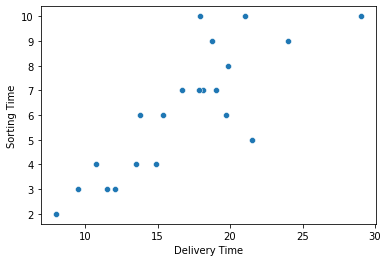

In [5]:
sns.scatterplot(x="Delivery Time",y="Sorting Time",data=df1)

In [6]:
df1 = df1.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"})

### Building regression model

In [7]:
model_1 = smf.ols("DT~ST",data=df1).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

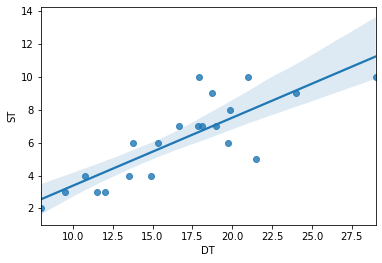

In [8]:
sns.regplot(x="DT",y="ST",data=df1)

In [9]:
model_1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [10]:
model_1.rsquared

0.6822714748417231

In [11]:
model_2 = smf.ols("np.log(DT)~ST",data=df1).fit()
model_2.rsquared

0.7109478980584187

In [12]:
df2 = df1
df2["y1"] = df2.ST**2
model_3 = smf.ols("np.log(DT)~ST+y1",data=df2).fit()
model_3.rsquared 
# This model gives us best r2 value hence we select this one.

0.764866634295373

In [13]:
model_3.params

Intercept    1.699704
ST           0.265922
y1          -0.012841
dtype: float64

In [14]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.20e-06
Time:                        22:59:29   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
y1            -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions


In [15]:
predictions_dt = model_3.predict(df1[["ST","y1"]])
predicted_delivery_time = np.exp(predictions_dt)
predicted_delivery_time

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

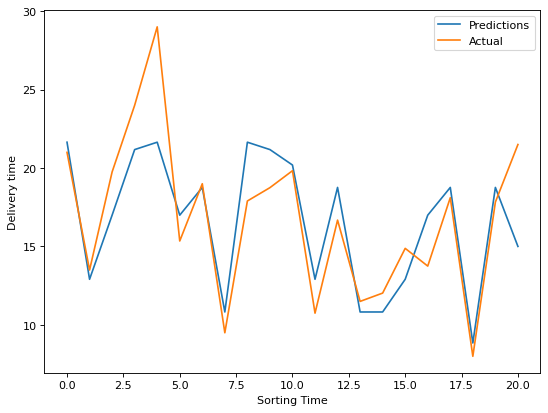

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(8,6),dpi=80)
plt.plot(predicted_delivery_time,label='Predictions')
plt.plot(df1["DT"],label='Actual')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery time")
plt.legend()